<a href="https://colab.research.google.com/github/Gold-gish/goldfish/blob/master/standardGan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

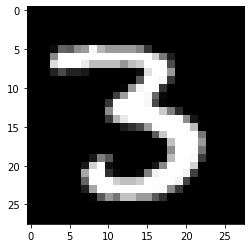

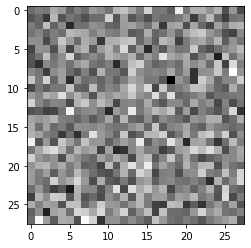

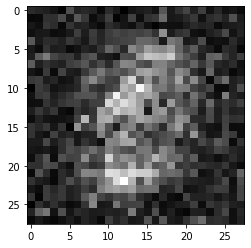

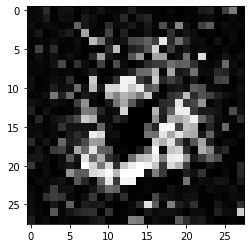

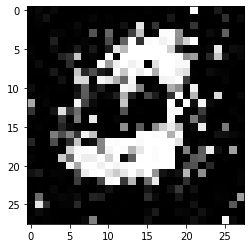

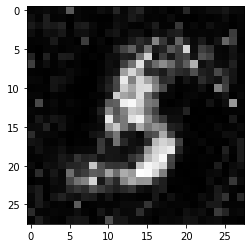

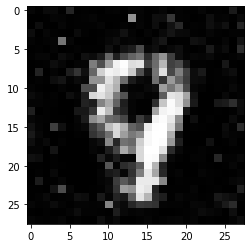

In [4]:
%tensorflow_version 2.x
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


class DCGAN():
  def __init__(self):
    (self.realimages,self.realimagesLabels),(_,_) = tf.keras.datasets.mnist.load_data()
    plt.imshow(self.realimages[12], 'gray')
    self.realimages = np.expand_dims(self.realimages,axis=3)

    self.realimages = (self.realimages-127.5)/127.5

    self.discriminator = self.discriminatorBuilder()
    self.discriminator.compile(loss='binary_crossentropy' , optimizer=tf.keras.optimizers.Adam(0.0002,0.5))

    self.generator = self.generatorBuilder()
    genInp = tf.keras.layers.Input((100,))
    genOut = self.generator(genInp)
    self.discriminator.trainable = False
    discOut = self.discriminator(genOut)
    self.generatorTrainerGan = tf.keras.models.Model(genInp,discOut)
    self.generatorTrainerGan.compile(loss='binary_crossentropy' , optimizer=tf.keras.optimizers.Adam(0.0002,0.5)) #note "optimizer!=)) optimizers"


  def generatorBuilder(self):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(256, input_dim=100))
    model.add(tf.keras.layers.LeakyReLU(0.2))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(tf.keras.layers.Dense(512))
    model.add(tf.keras.layers.LeakyReLU(0.2))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(tf.keras.layers.Dense(1024))
    model.add(tf.keras.layers.LeakyReLU(0.2))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.8))
    model.add(tf.keras.layers.Dense(28*28, activation='tanh'))
    model.add(tf.keras.layers.Reshape((28,28)))
    #model.summary()
    noise = tf.keras.layers.Input((100,))
    img = model(noise)
    return model


  def discriminatorBuilder(self):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28,28,1)))
    model.add(tf.keras.layers.Dense(512))
    model.add(tf.keras.layers.LeakyReLU(0.2))
    model.add(tf.keras.layers.Dense(256))
    model.add(tf.keras.layers.LeakyReLU(0.2))
    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
    #model.summary()
    image = tf.keras.layers.Input((28,28))
    output = model(image)
    return model


  def train(self,epochs,batchsize):
    realDiscOut = np.ones((batchsize,1))
    fakeDiscOut = np.zeros((batchsize,1))


    for epoch in range(epochs):
      randIndx = np.random.randint(0, self.realimages.shape[0], batchsize)
      randRealimages = self.realimages[randIndx]

      noise = np.random.normal(0, 1, (batchsize, 100))
      generatorOut = self.generator.predict(noise)

      discriminatorLossReal = self.discriminator.train_on_batch(randRealimages, realDiscOut)
      discriminatorLossFake = self.discriminator.train_on_batch(generatorOut  , fakeDiscOut)
      discriminatorLoss = 0.5* np.add(discriminatorLossFake, discriminatorLossReal)



      generatorLoss = self.generatorTrainerGan.train_on_batch(noise, realDiscOut)
      if (epoch % 500 == 0):
        plt.figure()
        noise = np.random.normal(0, 1, (1, 100))
        plt.imshow(tf.reshape(self.generator.predict(noise), shape=(28, 28)), cmap='gray')


if __name__ == "__main__":
  dcganclass = DCGAN()
  dcganclass.train(3000,128)



